## HOUSE PRICE PREDICTION

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
data= pd.read_csv(r"C:\Users\HP\Documents\Datasets\Housing.csv")
data

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [3]:
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [4]:
data.tail()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished
544,1750000,3850,3,1,2,yes,no,no,no,no,0,no,unfurnished


In [5]:
data.shape

(545, 13)

In [6]:
data.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [7]:
data.ndim

2

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [9]:
data.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [10]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
price,545.0,4.766729e+06,1.870440e+06,1750000.0,3430000.0,4340000.0,5740000.0,13300000.0
area,545.0,5.150541e+03,2.170141e+03,1650.0,3600.0,4600.0,6360.0,16200.0
bedrooms,545.0,2.965138e+00,7.380639e-01,1.0,2.0,3.0,3.0,6.0
bathrooms,545.0,1.286239e+00,5.024696e-01,1.0,1.0,1.0,2.0,4.0
stories,545.0,1.805505e+00,8.674925e-01,1.0,1.0,2.0,2.0,4.0
parking,545.0,6.935780e-01,8.615858e-01,0.0,0.0,0.0,1.0,3.0


In [11]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
price,545.0,4.766729e+06,1.870440e+06,1750000.0,3430000.0,4340000.0,5740000.0,13300000.0
area,545.0,5.150541e+03,2.170141e+03,1650.0,3600.0,4600.0,6360.0,16200.0
bedrooms,545.0,2.965138e+00,7.380639e-01,1.0,2.0,3.0,3.0,6.0
bathrooms,545.0,1.286239e+00,5.024696e-01,1.0,1.0,1.0,2.0,4.0
stories,545.0,1.805505e+00,8.674925e-01,1.0,1.0,2.0,2.0,4.0
parking,545.0,6.935780e-01,8.615858e-01,0.0,0.0,0.0,1.0,3.0


In [12]:
data.describe(include= "int")

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [13]:
data.describe(include= "object")

,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea,furnishingstatus
count,545,545,545,545,545,545,545
unique,2,2,2,2,2,2,3
top,yes,no,no,no,no,no,semi-furnished
freq,468,448,354,520,373,417,227


In [14]:
data.isna()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,False,False,False,False,False,False,False,False,False,False,False,False,False
541,False,False,False,False,False,False,False,False,False,False,False,False,False
542,False,False,False,False,False,False,False,False,False,False,False,False,False
543,False,False,False,False,False,False,False,False,False,False,False,False,False


In [15]:
data.isna().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [16]:
data.mainroad

0      yes
1      yes
2      yes
3      yes
4      yes
      ... 
540    yes
541     no
542    yes
543     no
544    yes
Name: mainroad, Length: 545, dtype: object

In [17]:
data['mainroad']

0      yes
1      yes
2      yes
3      yes
4      yes
      ... 
540    yes
541     no
542    yes
543     no
544    yes
Name: mainroad, Length: 545, dtype: object

In [18]:
data['mainroad'].nunique()

2

In [19]:
data.mainroad.unique()

array(['yes', 'no'], dtype=object)

In [20]:
data.furnishingstatus.unique()

array(['furnished', 'semi-furnished', 'unfurnished'], dtype=object)

In [21]:
data.price.nunique()

219

In [22]:
data['price'].unique

<bound method Series.unique of 0      13300000
1      12250000
2      12250000
3      12215000
4      11410000
         ...   
540     1820000
541     1767150
542     1750000
543     1750000
544     1750000
Name: price, Length: 545, dtype: int64>

In [23]:
data.mainroad.value_counts()

mainroad
yes    468
no      77
Name: count, dtype: int64

In [24]:
data.nunique()

price               219
area                284
bedrooms              6
bathrooms             4
stories               4
mainroad              2
guestroom             2
basement              2
hotwaterheating       2
airconditioning       2
parking               4
prefarea              2
furnishingstatus      3
dtype: int64

In [25]:
col1= data.select_dtypes(exclude= ['object','float']).columns
col1

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking'], dtype='object')

In [26]:
col= data.select_dtypes(include= np.number)
col

,price,area,bedrooms,bathrooms,stories,parking
0,13300000,7420,4,2,3,2
1,12250000,8960,4,4,4,3
2,12250000,9960,3,2,2,2
3,12215000,7500,4,2,2,3
4,11410000,7420,4,1,2,2
...,...,...,...,...,...,...
540,1820000,3000,2,1,1,2
541,1767150,2400,3,1,1,0
542,1750000,3620,2,1,1,0
543,1750000,2910,3,1,1,0


In [33]:
col= data.select_dtypes(include= 'int').columns
for i in col:
    print(data[i].value_counts())

price
3500000     17
4200000     17
4900000     12
3150000      9
5600000      9
            ..
6580000      1
4319000      1
4375000      1
4382000      1
13300000     1
Name: count, Length: 219, dtype: int64
area
6000    24
3000    14
4500    13
4000    11
5500     9
        ..
6862     1
4815     1
9166     1
6321     1
3620     1
Name: count, Length: 284, dtype: int64
bedrooms
3    300
2    136
4     95
5     10
6      2
1      2
Name: count, dtype: int64
bathrooms
1    401
2    133
3     10
4      1
Name: count, dtype: int64
stories
2    238
1    227
4     41
3     39
Name: count, dtype: int64
parking
0    299
1    126
2    108
3     12
Name: count, dtype: int64


In [51]:
col= data.select_dtypes(include= 'object').columns
for i in col:
    print(data[i].value_counts())

mainroad
yes    468
no      77
Name: count, dtype: int64
guestroom
no     448
yes     97
Name: count, dtype: int64
basement
no     354
yes    191
Name: count, dtype: int64
hotwaterheating
no     520
yes     25
Name: count, dtype: int64
airconditioning
no     373
yes    172
Name: count, dtype: int64
prefarea
no     417
yes    128
Name: count, dtype: int64
furnishingstatus
semi-furnished    227
unfurnished       178
furnished         140
Name: count, dtype: int64


In [57]:
def column_info(column):
    print(f'Description of Column : \n{data[column].describe()}')
    print(f'Value Counts of the rows : \n{data[column].value_counts()}')
    print(f'Unique values : \n{data[column].unique()}')
    print(f'Missing Values : \n{data[column].isna().sum()}\n')
for col in data:
    print(f'\033[1m---------------------------------------------------{col}---------------------------------------------------\033[0m')
    column_info(col)

---------------------------------------------------price---------------------------------------------------
Description of Column : 
count    5.450000e+02
mean     4.766729e+06
std      1.870440e+06
min      1.750000e+06
25%      3.430000e+06
50%      4.340000e+06
75%      5.740000e+06
max      1.330000e+07
Name: price, dtype: float64
Value Counts of the rows : 
price
3500000     17
4200000     17
4900000     12
3150000      9
5600000      9
            ..
6580000      1
4319000      1
4375000      1
4382000      1
13300000     1
Name: count, Length: 219, dtype: int64
Unique values : 
[13300000 12250000 12215000 11410000 10850000 10150000  9870000  9800000
  9681000  9310000  9240000  9100000  8960000  8890000  8855000  8750000
  8680000  8645000  8575000  8540000  8463000  8400000  8295000  8190000
  8120000  8080940  8043000  7980000  7962500  7910000  7875000  7840000
  7700000  7560000  7525000  7490000  7455000  7420000  7350000  7343000
  7245000  7210000  7140000  7070000  70350

In [59]:
column_info('area')

Description of Column : 
count      545.000000
mean      5150.541284
std       2170.141023
min       1650.000000
25%       3600.000000
50%       4600.000000
75%       6360.000000
max      16200.000000
Name: area, dtype: float64
Value Counts of the rows : 
area
6000    24
3000    14
4500    13
4000    11
5500     9
        ..
6862     1
4815     1
9166     1
6321     1
3620     1
Name: count, Length: 284, dtype: int64
Unique values : 
[ 7420  8960  9960  7500  8580 16200  8100  5750 13200  6000  6550  3500
  7800  6600  8500  4600  6420  4320  7155  8050  4560  8800  6540  8875
  7950  5500  7475  7000  4880  5960  6840  7482  9000  6360  6480  4300
  7440  6325  5150 11440  7680  8880  6240 11175  7700 12090  4000  5020
  4040  4260  6500  5700 10500  3760  8250  6670  3960  7410  5000  6750
  4800  7200  4100  6400  6350  4500  5450  3240  6615  8372  9620  6800
  8000  6900  3700  7020  7231  6254  7320  6525 15600  7160 11460  5828
  5200  5400  4640  5800  6660  4700  5136  4400  3

array([[<Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'area'}>],
       [<Axes: title={'center': 'bedrooms'}>,
        <Axes: title={'center': 'bathrooms'}>],
       [<Axes: title={'center': 'stories'}>,
        <Axes: title={'center': 'parking'}>]], dtype=object)

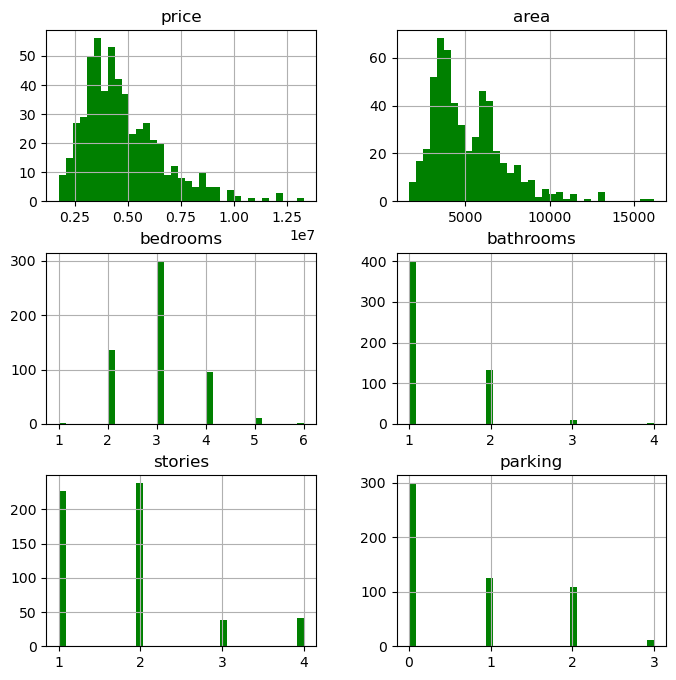

In [61]:
data.hist(figsize= (8,8), grid= True, color= 'g', bins= 35)
#plt.show()

<Axes: >

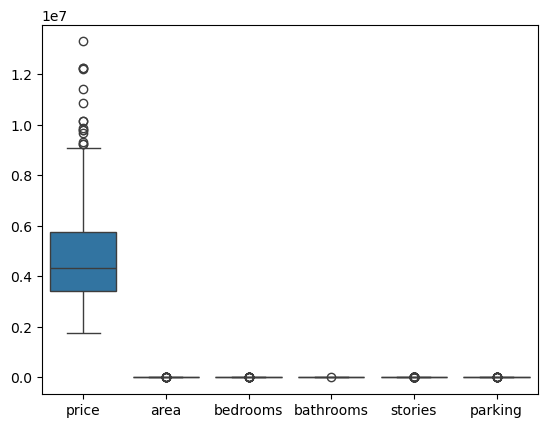

In [62]:
sns.boxplot(data)

<Axes: ylabel='area'>

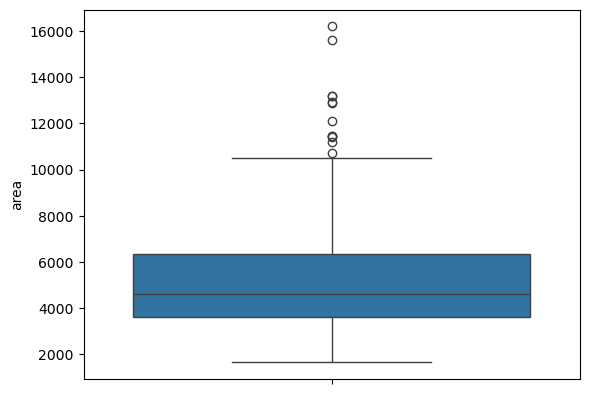

In [63]:
sns.boxplot(data['area'])

In [64]:
data['area'].describe()

count      545.000000
mean      5150.541284
std       2170.141023
min       1650.000000
25%       3600.000000
50%       4600.000000
75%       6360.000000
max      16200.000000
Name: area, dtype: float64

In [65]:
data[data['area'] > 10000][['area', 'price', 'bedrooms']]

,area,price,bedrooms
7,16200,10150000,5
10,13200,9800000,3
56,11440,7343000,4
64,11175,7000000,3
66,13200,6930000,2
69,12090,6790000,4
82,10500,6615000,3
125,15600,5943000,3
129,11460,5873000,3
142,10500,5600000,4


In [66]:
data[data['area'] > 10000]

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
7,10150000,16200,5,3,2,yes,no,no,no,no,0,no,unfurnished
10,9800000,13200,3,1,2,yes,no,yes,no,yes,2,yes,furnished
56,7343000,11440,4,1,2,yes,no,yes,no,no,1,yes,semi-furnished
64,7000000,11175,3,1,1,yes,no,yes,no,yes,1,yes,furnished
66,6930000,13200,2,1,1,yes,no,yes,yes,no,1,no,furnished
69,6790000,12090,4,2,2,yes,no,no,no,no,2,yes,furnished
82,6615000,10500,3,2,1,yes,no,yes,no,yes,1,yes,furnished
125,5943000,15600,3,1,1,yes,no,no,no,yes,2,no,semi-furnished
129,5873000,11460,3,1,3,yes,no,no,no,no,2,yes,semi-furnished
142,5600000,10500,4,2,2,yes,no,no,no,no,1,no,semi-furnished


In [67]:
data[data['area'] > 10000].index

Index([  7,  10,  56,  64,  66,  69,  82, 125, 129, 142, 146, 171, 186, 191,
       211, 224, 277, 403],
      dtype='int64')

In [68]:
# Temporary deletion
data.drop(index= [7,  10,  56,  64,  66,  69,  82, 125, 129, 142, 146, 171, 186, 191,
       211, 224, 277, 403], axis= 0)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [70]:
data

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [71]:
# Permanent deletion
data.drop(index= [7,  10,  56,  64,  66,  69,  82, 125, 129, 142, 146, 171, 186, 191,
       211, 224, 277, 403], axis= 0, inplace= True)

In [72]:
data

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [74]:
data.shape

(527, 13)

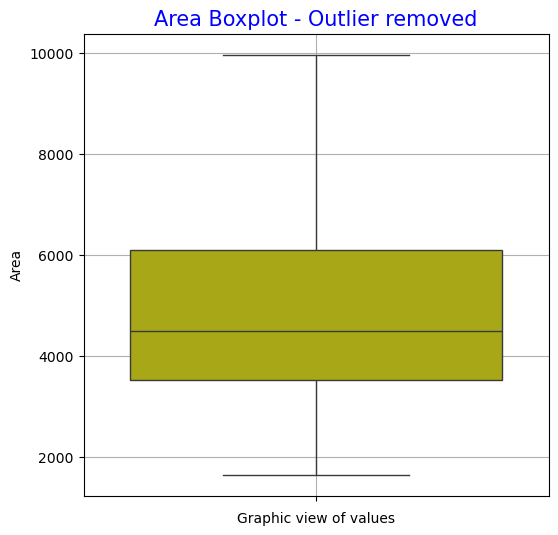

In [84]:
plt.figure(figsize= [6, 6])
sns.boxplot(data['area'], color= 'y')
plt.title(label= 'Area Boxplot - Outlier removed', fontdict= {'fontsize': 15, 'fontweight': 15, 'color': 'b', 'verticalalignment': 'baseline', 
                                                              'horizontalalignment': 'center'})
plt.xlabel('Graphic view of values')
plt.ylabel('Area')
plt.grid()
plt.show()

In [86]:
#data.corr()
# Gives error due to text data

In [89]:
data

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [91]:
data['mainroad'].value_counts()

mainroad
yes    450
no      77
Name: count, dtype: int64

In [93]:
for col in data.select_dtypes(include= 'object').columns:
    if col != 'furnishingstatus': 
        data[col]= data[col].map({'yes': 0, 'no': 1})
    elif col == 'furnishingstatus':
        data[col]= data[col].map({'furnished': 0, 'semi-furnished': 1, 'unfurnished': 2})
data

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,0,1,1,1,0,2,0,0
1,12250000,8960,4,4,4,0,1,1,1,0,3,1,0
2,12250000,9960,3,2,2,0,1,0,1,1,2,0,1
3,12215000,7500,4,2,2,0,1,0,1,0,3,0,0
4,11410000,7420,4,1,2,0,0,0,1,0,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,0,1,0,1,1,2,1,2
541,1767150,2400,3,1,1,1,1,1,1,1,0,1,1
542,1750000,3620,2,1,1,0,1,1,1,1,0,1,2
543,1750000,2910,3,1,1,1,1,1,1,1,0,1,0


In [95]:
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,0,1,1,1,0,2,0,0
1,12250000,8960,4,4,4,0,1,1,1,0,3,1,0
2,12250000,9960,3,2,2,0,1,0,1,1,2,0,1
3,12215000,7500,4,2,2,0,1,0,1,0,3,0,0
4,11410000,7420,4,1,2,0,0,0,1,0,2,1,0


In [97]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 527 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   price             527 non-null    int64
 1   area              527 non-null    int64
 2   bedrooms          527 non-null    int64
 3   bathrooms         527 non-null    int64
 4   stories           527 non-null    int64
 5   mainroad          527 non-null    int64
 6   guestroom         527 non-null    int64
 7   basement          527 non-null    int64
 8   hotwaterheating   527 non-null    int64
 9   airconditioning   527 non-null    int64
 10  parking           527 non-null    int64
 11  prefarea          527 non-null    int64
 12  furnishingstatus  527 non-null    int64
dtypes: int64(13)
memory usage: 57.6 KB


In [99]:
data.corr()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
price,1.000000,0.567533,0.363087,0.523598,0.436631,-0.294219,-0.274681,-0.182899,-0.092098,-0.465431,0.384819,-0.325323,-0.301598
area,0.567533,1.000000,0.170949,0.236109,0.151585,-0.306569,-0.222279,-0.067879,0.024542,-0.289730,0.380676,-0.216596,-0.168938
bedrooms,0.363087,0.170949,1.000000,0.358827,0.410117,0.012990,-0.083404,-0.101052,-0.060287,-0.172246,0.146721,-0.088338,-0.134165
bathrooms,0.523598,0.236109,0.358827,1.000000,0.329708,-0.043653,-0.132679,-0.111263,-0.075061,-0.196998,0.191378,-0.074563,-0.154913
stories,0.436631,0.151585,0.410117,0.329708,1.000000,-0.128244,-0.037583,0.177480,-0.025219,-0.307300,0.052770,-0.050708,-0.112331
mainroad,-0.294219,-0.306569,0.012990,-0.043653,-0.128244,1.000000,0.097798,0.045363,-0.012713,0.108541,-0.201547,0.196413,0.154479
guestroom,-0.274681,-0.222279,-0.083404,-0.132679,-0.037583,0.097798,1.000000,0.373888,-0.008770,0.143478,-0.050156,0.182851,0.127060
basement,-0.182899,-0.067879,-0.101052,-0.111263,0.177480,0.045363,0.373888,1.000000,-0.008105,0.037390,-0.056907,0.234388,0.103237
hotwaterheating,-0.092098,0.024542,-0.060287,-0.075061,-0.025219,-0.012713,-0.008770,-0.008105,1.000000,-0.129213,-0.070775,-0.051828,0.022896
airconditioning,-0.465431,-0.289730,-0.172246,-0.196998,-0.307300,0.108541,0.143478,0.037390,-0.129213,1.000000,-0.154178,0.113560,0.151853


<Axes: >

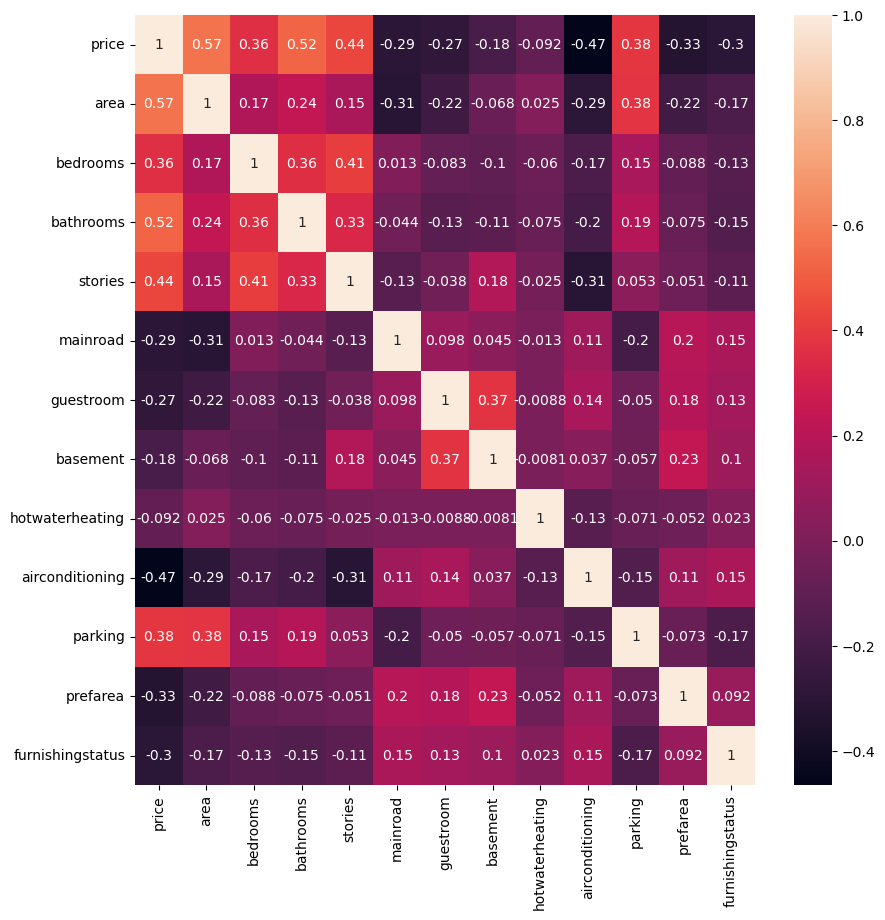

In [101]:
plt.figure(figsize= (10,10))
sns.heatmap(data.corr(), annot= True)

In [102]:
data.corr()['price']

price               1.000000
area                0.567533
bedrooms            0.363087
bathrooms           0.523598
stories             0.436631
mainroad           -0.294219
guestroom          -0.274681
basement           -0.182899
hotwaterheating    -0.092098
airconditioning    -0.465431
parking             0.384819
prefarea           -0.325323
furnishingstatus   -0.301598
Name: price, dtype: float64

In [103]:
x= data.iloc[0:, 1:]   #x= data.iloc[:, 1:]
x

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,7420,4,2,3,0,1,1,1,0,2,0,0
1,8960,4,4,4,0,1,1,1,0,3,1,0
2,9960,3,2,2,0,1,0,1,1,2,0,1
3,7500,4,2,2,0,1,0,1,0,3,0,0
4,7420,4,1,2,0,0,0,1,0,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
540,3000,2,1,1,0,1,0,1,1,2,1,2
541,2400,3,1,1,1,1,1,1,1,0,1,1
542,3620,2,1,1,0,1,1,1,1,0,1,2
543,2910,3,1,1,1,1,1,1,1,0,1,0


In [107]:
y= data.iloc[0:, 0]
y

0      13300000
1      12250000
2      12250000
3      12215000
4      11410000
         ...   
540     1820000
541     1767150
542     1750000
543     1750000
544     1750000
Name: price, Length: 527, dtype: int64

In [109]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state= 42)

In [111]:
x_train

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
75,4260,4,2,2,0,1,1,0,1,0,1,1
382,3150,3,1,2,0,1,0,1,1,0,1,0
528,3970,1,1,1,1,1,1,1,1,0,1,2
324,4500,3,1,2,1,1,0,1,0,0,1,1
295,2325,3,1,2,1,1,1,1,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
77,6500,3,2,3,0,1,1,1,0,0,0,0
113,9620,3,1,1,0,1,0,1,1,2,0,0
287,5500,3,1,2,0,1,1,1,0,0,1,2
453,3069,2,1,1,0,1,1,1,1,1,1,2


In [113]:
x_test

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
329,3960,3,1,2,0,1,1,1,1,0,1,0
411,2145,3,1,3,0,1,1,1,1,0,0,0
6,8580,4,3,4,0,1,1,1,0,2,0,1
298,5800,3,1,1,0,1,1,0,1,2,1,1
85,8250,3,2,3,0,1,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
301,3520,3,1,2,0,1,1,1,1,0,0,1
321,3630,3,2,2,0,1,1,0,1,2,1,1
219,7000,3,1,2,0,1,0,1,1,0,1,2
165,6450,3,2,1,0,0,0,0,1,0,1,2


In [115]:
y_train

75     6650000
382    3570000
528    2275000
324    4007500
295    4200000
        ...   
77     6650000
113    6083000
287    4200000
453    3150000
109    6090000
Name: price, Length: 421, dtype: int64

In [117]:
y_test

329     3990000
411     3430000
6      10150000
298     4200000
85      6510000
         ...   
301     4200000
321     4025000
219     4795000
165     5383000
381     3605000
Name: price, Length: 106, dtype: int64

In [119]:
lr= LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [121]:
y_train_pred= lr.predict(x_train)
y_test_pred= lr.predict(x_test)

In [123]:
y_train_pred

array([ 5114477.75217058,  3780644.43463791,  2389419.97653788,
        4429916.07353721,  2705592.45384751,  3869961.60241482,
        4426864.79740506,  2961505.69725092,  4535507.28439773,
        2917251.36335449,  6911939.28162321,  6249826.40803531,
        3148089.66032798,  2802028.20788951,  2912175.41505387,
        5008575.47989109,  5469669.73887341,  2937719.294811  ,
        4506872.31705162,  2833565.67710886,  2989303.60595495,
        6781907.90797275,  3752412.4877504 ,  2787319.28949821,
        4096976.45914452,  6725712.73746363,  3914052.64486233,
        7501667.86330184,  4755645.41663479,  4654959.39701936,
        3696690.47843833,  2927805.92641981,  2631186.9760491 ,
        4814942.3687934 ,  3928879.16307282,  7259992.4306512 ,
        4559598.26464666,  4133053.6310761 ,  2149565.9259008 ,
        3590548.470102  ,  6596619.06798478,  2481539.79432755,
        6669718.47819066,  5738482.08007031,  6290781.87896176,
        3611741.05370016,  5792724.90991

In [125]:
y_test_pred

array([3756341.98239778, 4252819.07546829, 9590110.90263656,
       4551435.74667748, 7176951.17201286, 5352981.4292333 ,
       3382196.72944131, 2802028.20788951, 6475800.13799485,
       3324352.94452256, 7026056.94027633, 4424441.98137247,
       5832934.32000596, 4314988.82759091, 3144352.55014216,
       5271732.62375181, 7556914.2469892 , 2899113.27366374,
       5306075.24360934, 6538524.04247568, 3954354.49125497,
       2303968.6772625 , 4445441.53952128, 5021933.45938916,
       4459346.89115314, 3722186.22609517, 6185246.28297809,
       3658646.00336012, 5038505.45067139, 3444469.41665897,
       3310594.53350932, 7922308.40600654, 4863956.8014218 ,
       3534908.2096353 , 6712059.97173857, 6868796.39057761,
       3873051.8389111 , 4668871.69323989, 7585877.1957337 ,
       5484613.3442372 , 4112713.69171751, 6378991.19150102,
       4034222.70317898, 6830057.8536742 , 5692888.9080591 ,
       4043497.56385717, 6327435.88465835, 4719646.04898888,
       2906599.25380589,

In [127]:
# To predict price of a data point that does not exist in dataset.
new_data_1= [[4270,4,3,2,0,1,1,0,2,0,1,1]] # Should be around 6650000
new_data_2= [[2500,3,2,1,1,1,1,0,0,1,1,0]] # Should be around 3570000
new_data_3= [[4000,3,3,1,1,1,0,0,1,1,0,2]] # Should be around 4200000

In [129]:
lr.predict(new_data_1)

array([5210517.65056267])

In [131]:
lr.predict(new_data_2)

array([4900837.53941107])

In [133]:
lr.predict(new_data_3)

array([5955339.22216131])

In [135]:
x.columns

Index(['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom',
       'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea',
       'furnishingstatus'],
      dtype='object')

In [137]:
lr.coef_    #Gives value of m in y=mx+c i.e. m1, m2 ....

array([ 2.90475128e+02,  1.03738823e+05,  9.26088059e+05,  4.15429922e+05,
       -4.04726201e+05, -3.45414256e+05, -2.59587306e+05, -4.12262844e+05,
       -8.32952912e+05,  2.17441551e+05, -6.08259528e+05, -1.71096494e+05])

In [139]:
coef_df= pd.DataFrame(lr.coef_, columns= ["Coefficient"], index= x.columns)
coef_df

,Coefficient
area,290.475128
bedrooms,103738.822891
bathrooms,926088.058843
stories,415429.921876
mainroad,-404726.200550
guestroom,-345414.255542
basement,-259587.305552
hotwaterheating,-412262.844238
airconditioning,-832952.911726
parking,217441.550848


In [141]:
mean_squared_error(y_train, y_train_pred)

992585326302.9519

In [143]:
np.sqrt(mean_squared_error(y_train, y_train_pred))

996285.7653820774

In [145]:
mean_absolute_error(y_train, y_train_pred)

732207.3898180332

In [147]:
r2_score(y_train, y_train_pred)

0.6757308768485437

In [149]:
print(f' Training Accuracy = {round(r2_score(y_train, y_train_pred), 4) * 100} %')

 Training Accuracy = 67.57 %


In [151]:
print(f' Test Accuracy = {round(r2_score(y_test, y_test_pred), 2) * 100} %')

 Test Accuracy = 66.0 %


In [153]:
def metrics(data1, data2):
    print(f' Mean Squared Error : {mean_squared_error(data1, data2)}')
    print(f' Root Mean Square Error : {np.sqrt(mean_squared_error(data1, data2))}')
    print(f' Mean Absolute Error : {mean_absolute_error(data1, data2)}')
    print(f' R2 Score : {r2_score(data1, data2)}')

In [155]:
metrics(y_train, y_train_pred)

 Mean Squared Error : 992585326302.9519
 Root Mean Square Error : 996285.7653820774
 Mean Absolute Error : 732207.3898180332
 R2 Score : 0.6757308768485437


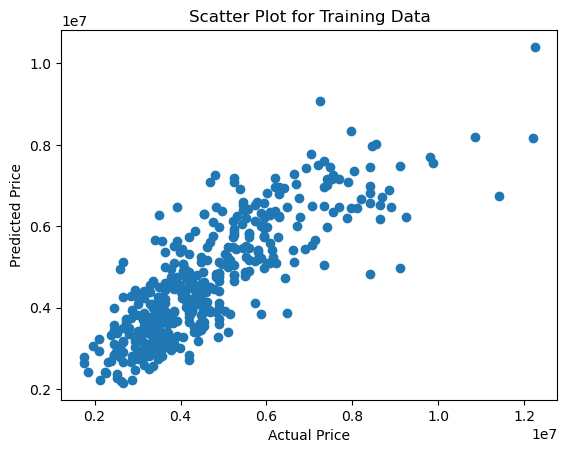

In [157]:
plt.scatter(y_train, y_train_pred)
plt.title("Scatter Plot for Training Data")
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.show()

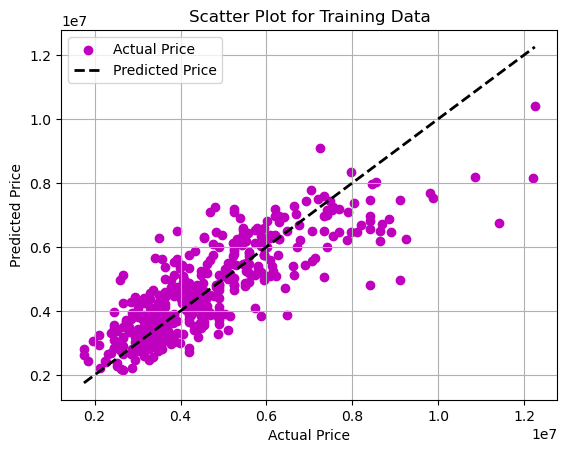

In [158]:
plt.scatter(y_train, y_train_pred, label= "Actual Price", color= 'm')
plt.plot([y_train.min(), y_train.max()],[y_train.min(), y_train.max()], 'k--', color= 'k', lw= 2, label= "Predicted Price")
plt.title("Scatter Plot for Training Data")
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.grid()
plt.legend()
plt.show()

In [161]:
metrics(y_test, y_test_pred)

 Mean Squared Error : 1656476192806.8284
 Root Mean Square Error : 1287041.6437733583
 Mean Absolute Error : 887360.8541033572
 R2 Score : 0.6632007472632169


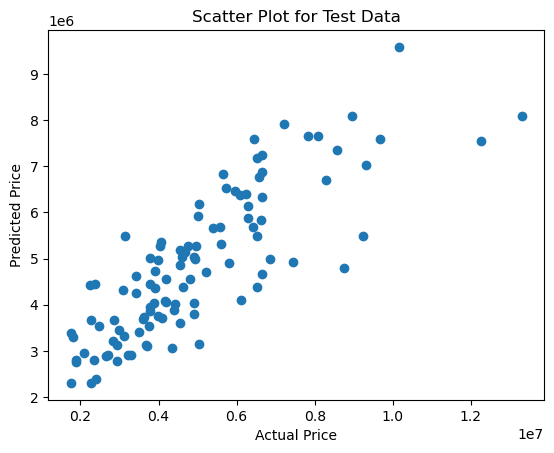

In [163]:
plt.scatter(y_test, y_test_pred)
plt.title("Scatter Plot for Test Data")
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.show()

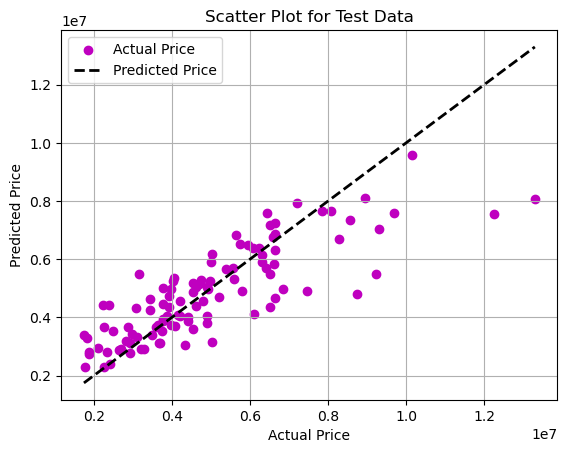

In [165]:
plt.scatter(y_test, y_test_pred, label= "Actual Price", color= 'm')
plt.plot([y_test.min(), y_test.max()],[y_test.min(), y_test.max()], 'k--', color= 'k', lw= 2, label= "Predicted Price")
plt.title("Scatter Plot for Test Data")
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.grid()
plt.legend()
plt.show()

In [167]:
poly= PolynomialFeatures(degree= 2)
poly

PolynomialFeatures()

In [169]:
x_train_poly= poly.fit_transform(x_train)
x_test_poly= poly.transform(x_test)

In [171]:
x_train, x_train_poly

(     area  bedrooms  bathrooms  stories  mainroad  guestroom  basement  \
 75   4260         4          2        2         0          1         1   
 382  3150         3          1        2         0          1         0   
 528  3970         1          1        1         1          1         1   
 324  4500         3          1        2         1          1         0   
 295  2325         3          1        2         1          1         1   
 ..    ...       ...        ...      ...       ...        ...       ...   
 77   6500         3          2        3         0          1         1   
 113  9620         3          1        1         0          1         0   
 287  5500         3          1        2         0          1         1   
 453  3069         2          1        1         0          1         1   
 109  6615         4          2        2         0          0         1   
 
      hotwaterheating  airconditioning  parking  prefarea  furnishingstatus  
 75                 

In [173]:
x_test, x_test_poly

(     area  bedrooms  bathrooms  stories  mainroad  guestroom  basement  \
 329  3960         3          1        2         0          1         1   
 411  2145         3          1        3         0          1         1   
 6    8580         4          3        4         0          1         1   
 298  5800         3          1        1         0          1         1   
 85   8250         3          2        3         0          1         1   
 ..    ...       ...        ...      ...       ...        ...       ...   
 301  3520         3          1        2         0          1         1   
 321  3630         3          2        2         0          1         1   
 219  7000         3          1        2         0          1         0   
 165  6450         3          2        1         0          0         0   
 381  4000         2          1        1         0          1         1   
 
      hotwaterheating  airconditioning  parking  prefarea  furnishingstatus  
 329                

In [175]:
poly_linear= LinearRegression()
poly_linear.fit(x_train_poly, y_train)

LinearRegression()

In [177]:
y_train_pred_poly= poly_linear.predict(x_train_poly)
y_test_pred_poly= poly_linear.predict(x_test_poly)

In [179]:
y_train_pred_poly

array([ 6544192.73681641,  3548196.6953125 ,  2898318.06933594,
        4208239.82421875,  2826115.06103516,  4243574.53515625,
        3715754.05712891,  3426531.14501953,  5754817.85351562,
        3065356.06201172,  5884869.61181641,  5878967.84619141,
        2203454.26855469,  3054265.79638672,  3451543.88916016,
        4200284.10595703,  5594710.13037109,  3203442.14746094,
        4076001.72753906,  2902191.74169922,  3481853.11572266,
        6305813.47265625,  2802621.86865234,  3457743.76953125,
        3311630.24755859,  7351857.7734375 ,  1973583.00927734,
        7724936.39257812,  4841031.32763672,  4687457.03564453,
        4034953.94384766,  3105239.93212891,  3258992.25439453,
        5192356.77636719,  4153019.91259766,  7360621.04833984,
        4099903.16699219,  3773526.27050781,  2108663.99658203,
        2956016.16943359,  6991152.11523438,  2818225.24902344,
        6431612.75488281,  5844842.00830078,  4370458.13916016,
        3637784.28076172,  5909191.12304

In [181]:
y_test_pred_poly

array([ 3561146.39941406,  3855704.30859375, 12013501.85009766,
        7381287.46142578,  6061882.70410156,  5565919.66601562,
        3338711.9921875 ,  3054265.79638672,  5411258.4296875 ,
        2777911.86669922,  7764257.08154297,  3937003.08935547,
        5581505.53808594,  3245453.44921875,  3469638.39794922,
        3267056.79248047,  7329645.81982422,  2557621.46972656,
        5597081.19335938,  6997735.98730469,   946976.26464844,
        2928660.07226562,  3875005.02685547,  5759199.09179688,
        4193930.39746094,  3914386.65283203,  7093963.98193359,
        3640253.95605469,  5353325.9375    ,  3468318.86621094,
        2784511.57128906,  7532212.24902344,  3763185.41796875,
        3659064.10351562,  6323038.97460938,  5605712.72509766,
        2702317.01367188,  6665889.66601562,  2022409.96826172,
        5824304.39599609,  5056886.89257812,  5187013.86572266,
        4671040.22607422,  6758591.05175781,  4195227.74121094,
        4412174.47900391,  6614566.26269

In [183]:
metrics(y_train, y_train_pred_poly)

 Mean Squared Error : 813580290743.9202
 Root Mean Square Error : 901986.857301103
 Mean Absolute Error : 656209.435193132
 R2 Score : 0.7342102885245391


In [185]:
metrics(y_test, y_test_pred_poly)

 Mean Squared Error : 3151132183750.5664
 Root Mean Square Error : 1775142.8629128886
 Mean Absolute Error : 1219296.9893315153
 R2 Score : 0.3593032188626314


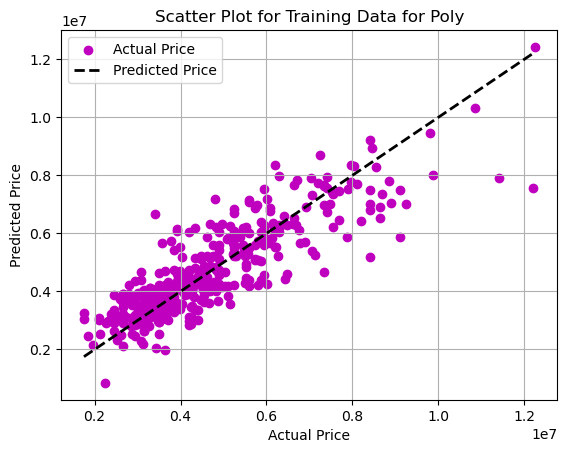

In [187]:
plt.scatter(y_train, y_train_pred_poly, label= "Actual Price", color= 'm')
plt.plot([y_train.min(), y_train.max()],[y_train.min(), y_train.max()], 'k--', color= 'k', lw= 2, label= "Predicted Price")
plt.title("Scatter Plot for Training Data for Poly")
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.grid()
plt.legend()
plt.show()

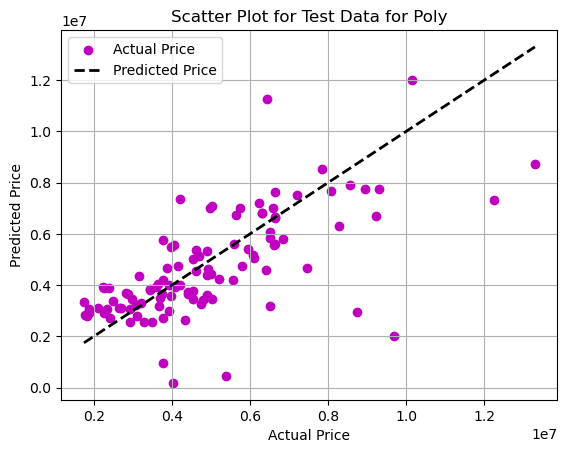

In [188]:
plt.scatter(y_test, y_test_pred_poly, label= "Actual Price", color= 'm')
plt.plot([y_test.min(), y_test.max()],[y_test.min(), y_test.max()], 'k--', color= 'k', lw= 2, label= "Predicted Price")
plt.title("Scatter Plot for Test Data for Poly")
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.grid()
plt.legend()
plt.show()

## END OF PROJECT